In [31]:
library(readr)
svmtxt <- read_csv("M:/Imarticus/data sets/Text mining/tsvm.txt", 
                 col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_character()
)
Warning message:
"320 parsing failures.
row col  expected    actual                                          file
  5  -- 1 columns 2 columns 'M:/Imarticus/data sets/Text mining/tsvm.txt'
 10  -- 1 columns 3 columns 'M:/Imarticus/data sets/Text mining/tsvm.txt'
 11  -- 1 columns 3 columns 'M:/Imarticus/data sets/Text mining/tsvm.txt'
 16  -- 1 columns 2 columns 'M:/Imarticus/data sets/Text mining/tsvm.txt'
 20  -- 1 columns 2 columns 'M:/Imarticus/data sets/Text mining/tsvm.txt'
... ... ......... ......... .............................................
See problems(...) for more details.
"

In [32]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")


docs <- Corpus(VectorSource(svmtxt))
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] c("Support Vector Machines:", "Theory and Applications", "Lipo Wang", "(ed.)", "Springer", "2005", "Preface", "The support vector machine (SVM) is a supervised learning method that", "generates input-output mapping functions from a set of labeled training data.", "The mapping function can be either a classification function", "gory of the input data", "kernel functions are often used to transform input data to a high-dimensional", "feature space in which the input data become more separable compared to", \n"the original input space. Maximum-margin hyperplanes are then created. <U+0091>The", "model thus produced depends on only a subset of the training data near the", "class boundaries. Similarly", "sion ignores any training data that is sufficiently close to the model prediction.", "SVMs are also said to belong to <U+0093>kernel methods<U+0094>.", "In addition to its solid mathematic

In [33]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")                              

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"

In [34]:

# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, stopwords()) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)


Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords()):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"

In [47]:
dtm <- TermDocumentMatrix(docs)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )
head(table)

,word,freq
data,data,77
prediction,prediction,63
protein,protein,56
secondary,secondary,44
structure,structure,43
genes,genes,40


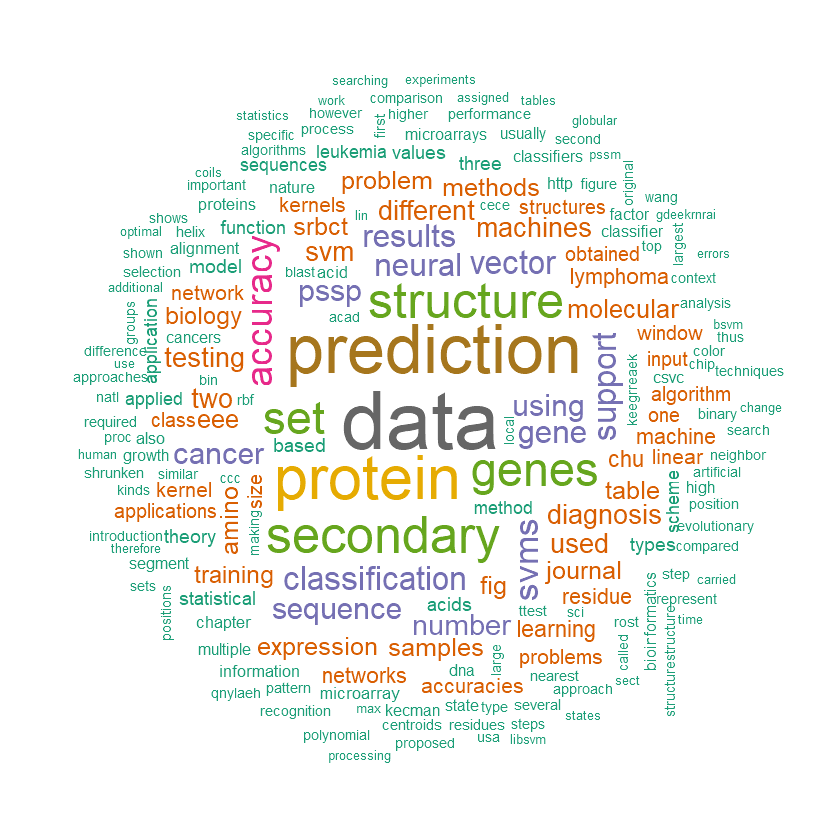

In [48]:
set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=200, random.order=FALSE, 
          colors=brewer.pal(8, "Dark2"))
